In [1]:
import os
from dslrpp.prepare.process import DSLRImage, Color, ImageType, isRaw
from dslrpp.prepare.calibrate import calibrate
import numpy as np

def __listdir(path):
    # optimizes the os.listdir function
    return [
            path + '/' + d for d in os.listdir(path)
            if os.path.isfile(path + '/' + d)
            ]

def __makedirs(path):
    # optimizes the os.makedirs function
    try:
        os.makedirs(path)
    except FileExistsError:
        pass
    
def __listraw(path):
    return [f for f in __listdir(path) if isRaw(f)]

In [2]:
path = "../test_slike"
lights = [
        DSLRImage(f, itype = ImageType.LIGHT)
        for f in __listraw(path + "/Light_frames")
        ]
bias = [
        DSLRImage(f, itype = ImageType.BIAS)
        for f in __listraw(path + "/Bias_frames")
        ]
darks = [
        DSLRImage(f, itype = ImageType.DARK)
        for f in __listraw(path + "/Dark_frames")
        ]
flats = [
        DSLRImage(f, itype = ImageType.FLAT)
        for f in __listraw(path + "/Flat_fields")
        ]
images = np.concatenate((lights, bias, darks, flats))

imagesR = np.empty((0))
imagesG = np.empty((0))
imagesB = np.empty((0))

File unsupported: ../test_slike/Light_frames/IMG_7421.fit
Ignoring this file.
File unsupported: ../test_slike/Light_frames/IMG_7128.fit
Ignoring this file.
Initializing image class from file: ../test_slike/Light_frames/IMG_7128.CR2
Reading file: ../test_slike/Light_frames/IMG_7128.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0)
Initializing image class from file: ../test_slike/Light_frames/IMG_7299.CR2
Reading file: ../test_slike/Light_frames/IMG_7299.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_1)
Initializing image class from file: ../test_slike/Light_frames/IMG_7300.CR2
Reading file: ../test_slike/Light_frames/IMG_7300.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_2)
Initializing image class from file: ../test_slike/Light_frames/IMG_7200.CR2
Reading file: ../test_slike/Light_frames/IMG_7200.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=N

In [3]:
print(lights[0].imdata.min(), lights[0].imdata.max())

binX = 4
binY = 4

for im in images:
    im.binImage(binX, binY)
print(lights[0].imdata.min(), lights[0].imdata.max())
print(flats[0].imdata.min(), flats[0].imdata.max())

1986.0 15305.0
Binning image: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0) (4x4)
Binning image: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_1) (4x4)
Binning image: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_2) (4x4)
Binning image: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_3) (4x4)
Binning image: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_4) (4x4)
Binning image: DSLRImage(imtype=ImageType.BIAS, color=None, fname=bias_0) (4x4)
Binning image: DSLRImage(imtype=ImageType.DARK, color=None, fname=dark_0) (4x4)
Binning image: DSLRImage(imtype=ImageType.FLAT, color=None, fname=flat_0) (4x4)
2045.0 13405.5
2611.9375 7127.125


In [4]:
from matplotlib import pyplot as plt

for im in images:
    plt.figure()
    plt.imshow(im.imdata/2**14, cmap='gray')

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [5]:
red, green, blue = False, True, True

if(red):
    clights = np.array([im.extractChannel(Color.RED) for im in lights])
    cbias = np.array([im.extractChannel(Color.RED) for im in bias])
    cflats = np.array([im.extractChannel(Color.RED) for im in flats])
    cdarks = np.array([im.extractChannel(Color.RED) for im in darks])
    calibrate(clights, cbias, cdarks, cflats)
    imagesR = clights
if(green):
    clights = np.array([im.extractChannel(Color.GREEN) for im in lights])
    cbias = np.array([im.extractChannel(Color.GREEN) for im in bias])
    cflats = np.array([im.extractChannel(Color.GREEN) for im in flats])
    cdarks = np.array([im.extractChannel(Color.GREEN) for im in darks])
    calibrate(clights, cbias, cdarks, cflats)
    imagesG = clights
if(blue):
    clights = np.array([im.extractChannel(Color.BLUE) for im in lights])
    cbias = np.array([im.extractChannel(Color.BLUE) for im in bias])
    cflats = np.array([im.extractChannel(Color.BLUE) for im in flats])
    cdarks = np.array([im.extractChannel(Color.BLUE) for im in darks])
    calibrate(clights, cbias, cdarks, cflats)
    imagesB = clights

Extracting GREEN channel from image DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_1)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_2)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_3)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_4)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.BIAS, color=None, fname=bias_0)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.FLAT, color=None, fname=flat_0)
Extracting GREEN channel from image DSLRImage(imtype=ImageType.DARK, color=None, fname=dark_0)
Stacking images:
	<class 'dslrpp.prepare.process.Monochrome'>: DSLRImage(imtype=ImageType.BIAS, color=Color.GREEN, fname=bias_0_GREEN)
Master bias: [2042.0, 2066.46875]
dark: [2042.03125, 2463.1875]
	dark: [-8.0625, 410.84375]
Sta

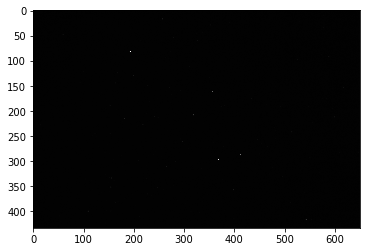

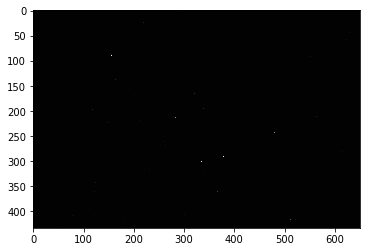

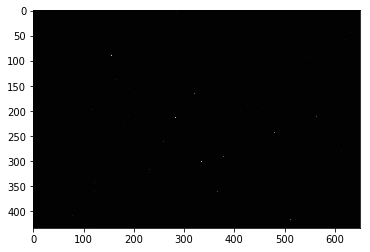

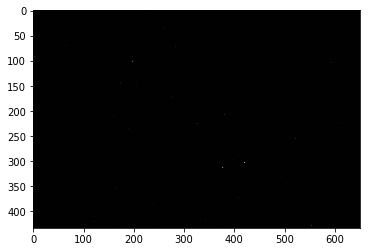

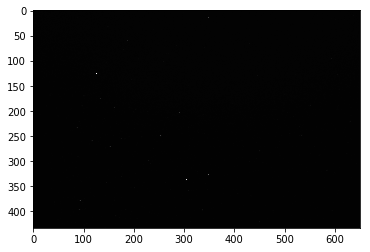

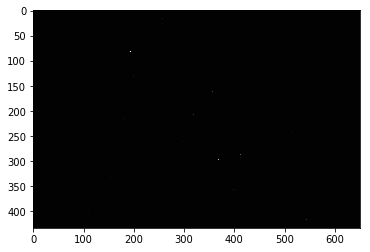

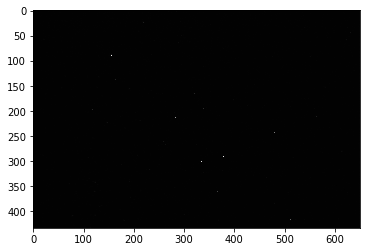

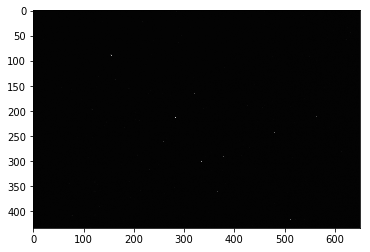

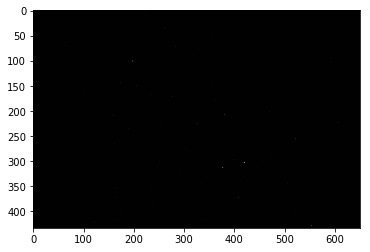

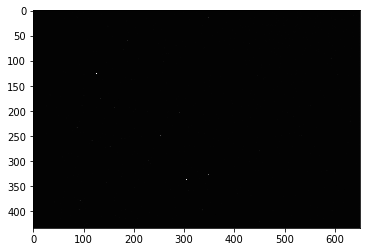

In [6]:
for im in np.concatenate((imagesG, imagesB)):
    plt.figure()
    plt.imshow(im.imdata, cmap='gray')

plt.show()

[[0.00237288 0.00228675 0.00238739 ... 0.00256851 0.00186328 0.00274694]
 [0.00210385 0.00148203 0.0031978  ... 0.00253061 0.00218115 0.00278877]
 [0.00352607 0.00289041 0.00282836 ... 0.00274857 0.00215964 0.00286273]
 ...
 [0.00370436 0.00284978 0.00287742 ... 0.00219021 0.00300275 0.00287277]
 [0.00341901 0.00248075 0.00241725 ... 0.00217476 0.00241721 0.00311505]
 [0.00248626 0.00262424 0.00302441 ... 0.00353863 0.00215478 0.00266665]]
[[0.00396186 0.00334748 0.00379499 ... 0.00291541 0.00280597 0.00275238]
 [0.00707593 0.00671352 0.00438242 ... 0.00292556 0.00294491 0.00283398]
 [0.00707322 0.01072996 0.00903713 ... 0.00256679 0.00276726 0.00274881]
 ...
 [0.00322177 0.00241237 0.00264591 ... 0.00128631 0.00208583 0.00276026]
 [0.0027175  0.00257361 0.00251659 ... 0.00234151 0.00207587 0.00264894]
 [0.00319953 0.00360749 0.0021025  ... 0.00217601 0.00218976 0.00251466]]
[[0.00436441 0.00328549 0.00338789 ... 0.00312945 0.00301955 0.00277798]
 [0.00718113 0.00611934 0.00377984 ... 

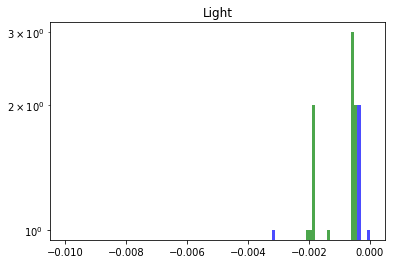

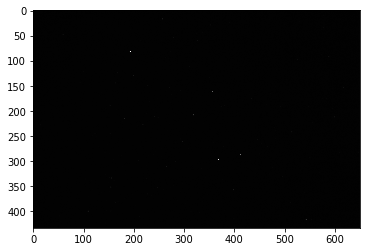

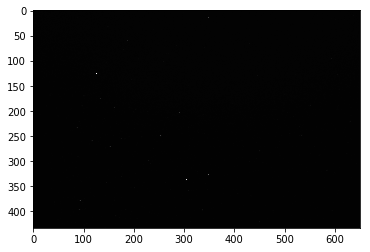

In [7]:
l0 = imagesG[0].imdata
print(l0)
l1 = imagesG[1].imdata
print(l1)
l2 = imagesG[2].imdata
print(l2)
l3 = imagesG[3].imdata
print(l3)
l4 = imagesG[4].imdata
print(l4)

plt.figure()
plt.title('Light')
plt.hist(l0.ravel(), range=[-0.01,0], bins=100, color='green', alpha=0.7)
plt.hist(l4.ravel(), range=[-0.01,0], bins=100, color='blue', alpha=0.7)
plt.yscale('log')

plt.figure()
plt.imshow(imagesG[0].imdata, cmap='gray')
plt.figure()
plt.imshow(imagesG[4].imdata, cmap='gray')

plt.show()

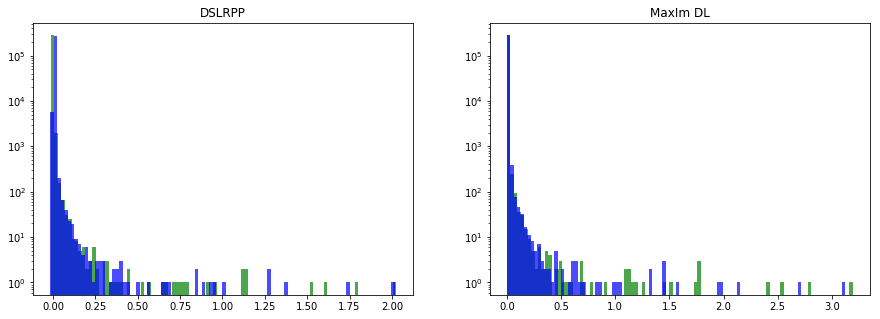

In [8]:
from astropy.io import fits

m0 = fits.open("../test_slike/IMG_7128_g4_P.fit")
m0 = m0[0].data

m1 = fits.open("../test_slike/IMG_7421_g4_P.fit")
m1 = m1[0].data

f = plt.figure(figsize=(15,5))

f.add_subplot(121)
plt.title('DSLRPP')
plt.hist(l0.ravel(), range=[l0.min(),l0.max()], bins=100, color='green', alpha=0.7)
plt.hist(l4.ravel(), range=[l4.min(),l4.max()], bins=100, color='blue', alpha=0.7)
plt.yscale('log')

f.add_subplot(122)
plt.title('MaxIm DL')
plt.hist(m0.ravel(), range=[m0.min(),m0.max()], bins=100, color='green', alpha=0.7)
plt.hist(m1.ravel(), range=[m1.min(),m1.max()], bins=100, color='blue', alpha=0.7)
plt.yscale('log')

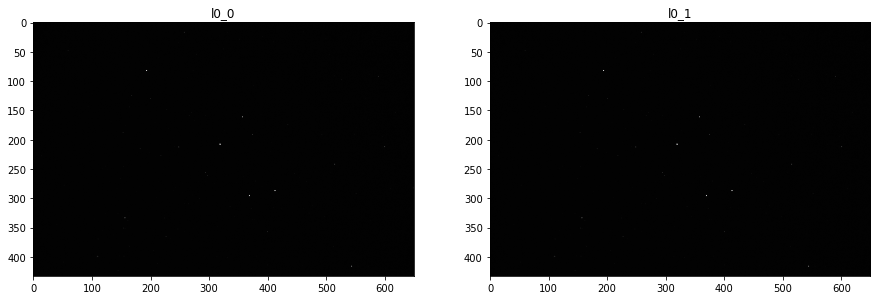

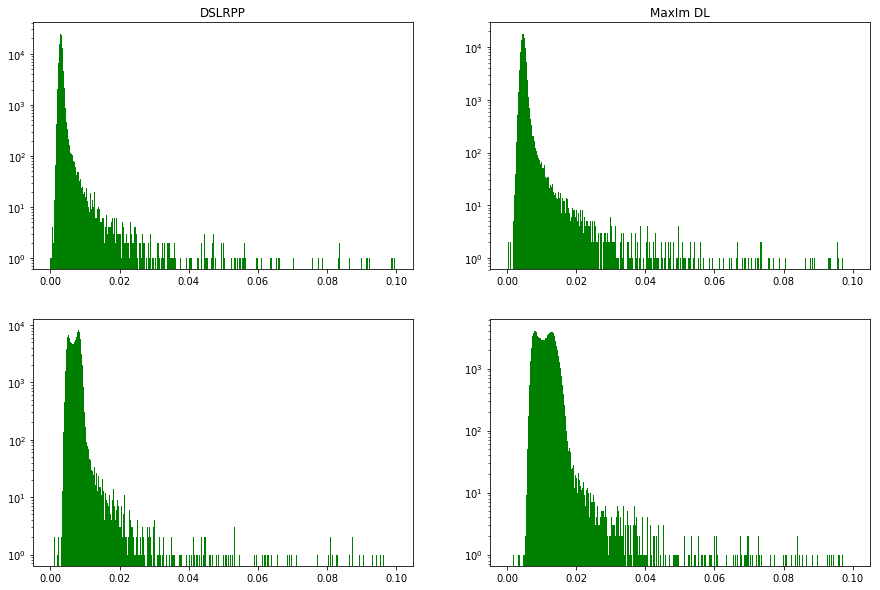

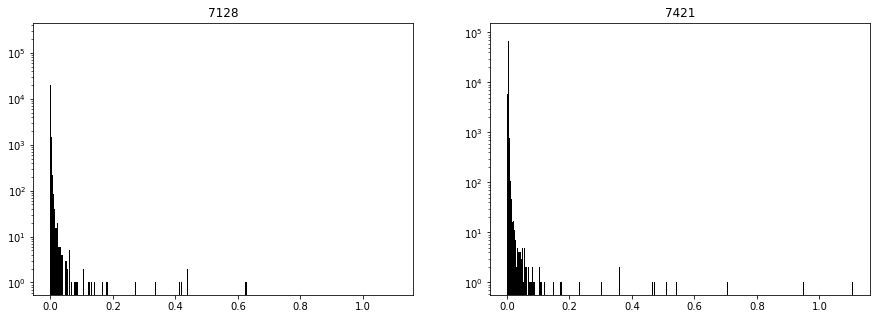

D1 = 0.0018143089387958257
D2 = 0.0018143089387958257
d1 = 0.3533701116817753
d2 = 0.15995638612931407


In [12]:
f = plt.figure(figsize=(15,5))
f.add_subplot(121)
plt.title('l0_0')
plt.imshow(l0, cmap='gray')

l0 = l0[:433, :650]
l4 = l4[:433, :650]

f.add_subplot(122)
plt.title('l0_1')
plt.imshow(l0, cmap='gray')

d0 = m0 - l0
d1 = m1 - l4

f = plt.figure(figsize=(15,10))

f.add_subplot(221)
plt.title('DSLRPP')
plt.hist(l0.ravel(), range=[0,0.1], bins=1000, color='green')
plt.yscale('log')

f.add_subplot(222)
plt.title('MaxIm DL')
plt.hist(m0.ravel(), range=[0,0.1], bins=1000, color='green')
plt.yscale('log')

f.add_subplot(223)
plt.hist(l4.ravel(), range=[0,0.1], bins=1000, color='green')
plt.yscale('log')

f.add_subplot(224)
plt.hist(m1.ravel(), range=[0,0.1], bins=1000, color='green')
plt.yscale('log')

f1 = plt.figure(figsize=(15,5))

f1.add_subplot(121)
plt.title('7128')
plt.hist(d0.ravel(), range=[d1.min(),d1.max()], bins=1000, color='black')
plt.yscale('log')

f1.add_subplot(122)
plt.title('7421')
plt.hist(d1.ravel(), range=[d1.min(),d1.max()], bins=1000, color='black')
plt.yscale('log')

plt.show()

sd0 = np.mean(d0)
sd1 = np.mean(d0)

print("D1 =", sd0)
print("D2 =", sd1)
print("d1 =", sd0/m0.mean())
print("d2 =", sd1/m1.mean())

In [ ]:
plt.hist(l0.ravel(), range=[0,0.1], bins=1000, color='green')
plt.yscale('log')

f = plt.figure(figsize=(15,10))

f.add_subplot(221)
plt.title('DSLRPP')
plt.imshow(l0, cmap='gray')

f.add_subplot(222)
plt.title('MaxIm DL')
plt.imshow(m0, cmap='gray')

f.add_subplot(223)
plt.imshow(l4, cmap='gray')

f.add_subplot(224)
plt.imshow(m1, cmap='gray')

plt.show()